In [1]:
# import all required modules 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# converting 'BMI' from float to int
df['BMI'] = df['BMI'].astype("int64")

# converting 'DiabetesPedigreeFunction' from float to int
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype("int64")

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

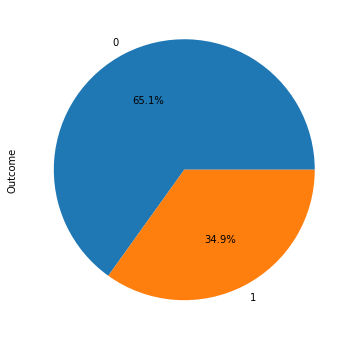

In [7]:
plt.figure(figsize=(6,6))
df['Outcome'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [8]:
x=df.iloc[:,:-1] # rest of other than target
y=df.iloc[:,-1] # Outcome

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

# Basic Ensembling

# (1) Max voting

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
# make an object for all those 3 algo 
model1=DecisionTreeClassifier()
model2=LogisticRegression()
model3=GaussianNB()

In [12]:
# train 3 models 
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

In [13]:
# ensemble module 
estimators=[('dt', model1),('lr', model2),('nb',model3)]
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators,voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7922077922077922

In [14]:
y_pred=model.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.61      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



# (2) Averaging

In [16]:
# make an object for all those 3 algo 
model1=DecisionTreeClassifier()
model2=LogisticRegression()
model3=GaussianNB()

# train 3 models 
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

GaussianNB()

In [17]:
estimators=[('dt', model1),('lr', model2),('nb',model3)]
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators,voting='soft')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7705627705627706

In [18]:
y_pred=model.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       146
           1       0.73      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



# Advance Ensemble

# (1) Stacking

In [20]:
# base model 
lr=LogisticRegression()
dt1=DecisionTreeClassifier() # gini index 
dt2=DecisionTreeClassifier(criterion="entropy") # entropy 
model_list=[lr,dt1,dt2]

In [21]:
# meta classifer 
meta_lr=LogisticRegression()
meta_dt=DecisionTreeClassifier()

In [22]:
from mlxtend.classifier import StackingClassifier

In [23]:
stack1=StackingClassifier(classifiers=model_list,meta_classifier=meta_dt)
stack1.fit(x_train,y_train)
y_pred=stack1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       146
           1       0.61      0.69      0.65        85

    accuracy                           0.72       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.73      0.72      0.73       231



In [24]:
stack2=StackingClassifier(classifiers=model_list,meta_classifier=meta_lr)
stack2.fit(x_train,y_train)
y_pred=stack2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       146
           1       0.67      0.62      0.65        85

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



# (2) Bagging

## (1) Bootstrapping Bagging with replacement

In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
bg=BaggingClassifier(LogisticRegression(),
                    n_estimators=10,
                    max_samples=100,
                    random_state=1)

In [27]:
bg.fit(x_train,y_train)
y_pred=bg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.59      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## (2) Pasting Bagging without replacement

In [28]:
bg2=BaggingClassifier(LogisticRegression(),
                      n_estimators=10,
                      max_samples=100,
                      random_state=1,
                      bootstrap=False) # no replacement as bootstrap is false 

In [29]:
bg2.fit(x_train,y_train)
y_pred=bg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.59      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## (3)Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier 

In [31]:
rf=RandomForestClassifier(n_estimators=10,
                          max_features=5,
                          random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.73      0.65      0.69        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



# boosting techniques

# (1) adaboost 

In [32]:
# algorithm based ensemple ML 
from sklearn.ensemble import AdaBoostClassifier

In [33]:
from sklearn.metrics import classification_report

In [34]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



# (2) gradient boost

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
#if i will not specify parameters then it will be greedy by nature so we decide to keep limited feature and max_depth
gb = GradientBoostingClassifier(n_estimators=20,
                                learning_rate = 0.5,
                                max_features=5,
                                max_depth = 2,
                                random_state = 0)

In [37]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=5,
                           n_estimators=20, random_state=0)

In [38]:
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.80      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



# Xgboost

extream gradient boosting 

In [39]:
! pip3 install xgboost

In [40]:
# For better results we need to  tune the parameters
from xgboost import XGBClassifier
xgboost = XGBClassifier(learning_rate =0.05,
                        n_estimators=500,
                        max_depth=2,
                        min_child_weight=1)
xgboost.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))

[20:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.80      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231

